
<img src="../Images/video_16_serialize_deserialize.png">

Problem: serialize or deserialize

In [2]:
class Node:
    def __init__(self, val):
        self.right = None
        self.left = None
        self.data = val

In [10]:
# Time O(n) Space O(n)
def serialize(root, arr):
    s = []
    
    s.append(root)
    
    while(len(s)>0):
        curr = s.pop(0)
        if(curr==None):
            arr.append('N')
            continue
        arr.append(curr.data)
        if(curr.left!=None):
            s.append(curr.left)
        else:
            s.append(None)
        if(curr.right!=None):
            s.append(curr.right)
        else:
            s.append(None)
    print(arr)

In [17]:
# Time O(n) Space O(n)
def deserialize(arr):
    ix = 0
    curr = arr[ix]
    if(curr != 'N'):
        root = Node(curr)
    else:
        return None
    
    q = []
    q.append(root)
    while(len(q)>0):
        curr = q.pop(0)
        ix+=1
        l = arr[ix]
        ix+=1
        r = arr[ix]
        if(l!='N'):
            curr.left = Node(l)
            q.append(curr.left)
        else:
            curr.left = None
        if(r!='N'):
            curr.right = Node(r)
            q.append(curr.right)
        else:
            curr.right = None
    return root

In [29]:
# Time O(n) Space O(1)
def serialize_pre(root, arr):
    if(root == None):
        arr.append('N')
        return
    arr.append(root.data)
    serialize_pre(root.left, arr)
    serialize_pre(root.right, arr)
    return

In [65]:
# Time O(n) Space O(1)
def deserialize_pre(arr):
    if(len(arr)==0):
        return None
    curr = arr.pop(0)
    print(curr)
    if(curr == 'N'):
        return None
    root = Node(curr)
    root.left = deserialize_pre(arr)
    root.right = deserialize_pre(arr)
    return root

In [66]:
a = Node(10)
a.left = Node(20)
a.right = Node(30)

a.left.left = Node(40)
a.left.right = Node(50)
a.right.left = Node(60)
a.right.right = Node(70)

a.left.left.left = Node(80)
a.left.left.right = Node(90)


# '''
#                    10
#                 /      \
#                20       30
#               /  \     /  \
#             40   50   60   70
#             / \
#           80  90
# '''

In [67]:
arr=[]
serialize_pre(a, arr)
arr

[10,
 20,
 40,
 80,
 'N',
 'N',
 90,
 'N',
 'N',
 50,
 'N',
 'N',
 30,
 60,
 'N',
 'N',
 70,
 'N',
 'N']

In [68]:
root = deserialize_pre(arr)
root.data

10
20
40
80
N
N
90
N
N
50
N
N
30
60
N
N
70
N
N


10

In [69]:
import matplotlib.pyplot as plt
import numpy as np
def drawBST_(T, x0, x1, y, y_inc,ax):
    if T is not None:
        xm = (x0+x1)/2
        yn = y-y_inc
        if T.left is not None:
            p=np.array([[xm,y], [(x0+xm)/2,yn]])
            ax.plot(p[:,0],p[:,1],linewidth=1,color='k')
            drawBST_(T.left,x0,xm,yn, y_inc,ax)
        if T.right is not None:
            p=np.array([[xm,y], [(x1+xm)/2,yn]])
            ax.plot(p[:,0],p[:,1],linewidth=1,color='k')
            drawBST_(T.right,xm,x1,yn, y_inc,ax)
        ax.text(xm,y, str(T.data), size=10,ha="center", va="center",
            bbox=dict(facecolor='w',boxstyle="circle"))

def drawBST(T): 
    #plt.close('all') 
    fig, ax = plt.subplots()
    drawBST_(T, 0, 800, 800, 80, ax)
    ax.set_aspect(1.0)
    ax.axis('off') 
    plt.show()

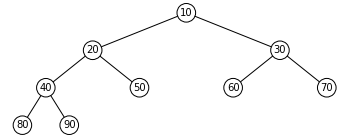

In [70]:
drawBST(root)